Testing a theory that smaller values of phi may produce nicer spaces for SSPs (will take longer to wrap around)

In [7]:
%matplotlib inline
import nengo
import numpy as np
import nengo_spa as spa
from spatial_semantic_pointers.utils import power, encode_point, make_good_unitary, get_axes, \
    generate_region_vector, get_heatmap_vectors, power, make_fixed_dim_periodic_axis, make_optimal_periodic_axis
import matplotlib.pyplot as plt

In [24]:
def make_axis(dim, rng, phi_limit=np.pi/10.):
    
    phi = rng.uniform(-phi_limit, phi_limit, size=((dim - 1) // 2,))
    phi = rng.randn((dim - 1) // 2)*np.pi
    
    fv = np.zeros(dim, dtype='complex64')
    fv[0] = 1
    fv[1:(dim + 1) // 2] = np.cos(phi) + 1j * np.sin(phi)
    fv[-1:dim // 2:-1] = np.conj(fv[1:(dim + 1) // 2])
    if dim % 2 == 0:
        fv[dim // 2] = 1

    assert np.allclose(np.abs(fv), 1)
    v = np.fft.ifft(fv)
    # assert np.allclose(v.imag, 0, atol=1e-5)
    v = v.real
    assert np.allclose(np.fft.fft(v), fv)
    assert np.allclose(np.linalg.norm(v), 1)
    return spa.SemanticPointer(v)

def plot_1d(X, xs):
    sim = np.zeros((len(xs),))
    for i, x in enumerate(xs):
        sim[i] = power(X, x).v[0]
    return sim

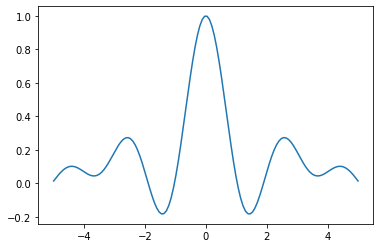

In [25]:
dim = 128
phi_limit=np.pi*2
res = 128
limit = 5
xs = np.linspace(-limit, limit, res)
rng = np.random.RandomState(seed=13)
X = make_axis(dim=dim, rng=rng, phi_limit=phi_limit)
sim = plot_1d(X, xs)
plt.plot(xs, sim)